<a href="https://colab.research.google.com/github/harishborra/BloodCancerDetectionUsingMicroscopicImages/blob/main/BloodCancerDetectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=14U9w56mn_LXGpiC7IDhmKlFi6rlmGpV7' -O kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/leukemia-classification

--2021-07-11 08:32:04--  https://docs.google.com/uc?export=download&id=14U9w56mn_LXGpiC7IDhmKlFi6rlmGpV7
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.139, 74.125.142.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4erq8jmahq18ri7ov7uvf51dvrf8tgko/1625992275000/05875276406787995919/*/14U9w56mn_LXGpiC7IDhmKlFi6rlmGpV7?e=download [following]
--2021-07-11 08:32:05--  https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4erq8jmahq18ri7ov7uvf51dvrf8tgko/1625992275000/05875276406787995919/*/14U9w56mn_LXGpiC7IDhmKlFi6rlmGpV7?e=download
Resolving doc-08-88-docs.googleusercontent.com (doc-08-88-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-08-88-docs.googleusercontent.com (doc-08-88-d

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
from google.colab import drive

In [ ]:
with zipfile.ZipFile('/content/leukemia-classification.zip') as zip_ref:
  zip_ref.extractall()

In [ ]:
!rm leukemia-classification.zip

In [ ]:
import os
import shutil

In [ ]:
try:
    os.mkdir('Dataset')
    os.mkdir('Dataset/Train')
    os.mkdir('Dataset/Train/Yes')
    os.mkdir('Dataset/Train/No')
    os.mkdir('Dataset/Test')
    os.mkdir('Dataset/Validation')
    os.mkdir('Dataset/Validation/Yes')
    os.mkdir('Dataset/Validation/No')
except:
    pass

In [ ]:
from skimage import exposure
from PIL import Image
from skimage.io import imread, imshow

In [ ]:
for num in range(0,3):
    for i in os.listdir('/content/C-NMC_Leukemia/training_data/fold_' + str(num) + '/all'):
        src = '/content/C-NMC_Leukemia/training_data/fold_' + str(num) + '/all/' + i
        img = Image.open(src)
        img2 = img.convert('L')
        des = '/content/Dataset/Train/Yes/' + i
        img2.save(des)
    for i in os.listdir('/content/C-NMC_Leukemia/training_data/fold_' + str(num) + '/hem'):
        src = '/content/C-NMC_Leukemia/training_data/fold_' + str(num) + '/hem/' + i
        img = Image.open(src)
        img2 = img.convert('L')
        des = '/content/Dataset/Train/No/' + i
        img2.save(des)

In [ ]:
for i in os.listdir('/content/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data'):
        src = '/content/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/' + i
        img = Image.open(src)
        img2 = img.convert('L')
        des = '/content/Dataset/Test/' + i
        img2.save(des)

In [ ]:
import pandas as pd

In [ ]:
validation_df = pd.read_csv('/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')
validation_df.head()

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1


In [ ]:
file_names = validation_df['new_names']
file_targets = validation_df['labels']

In [ ]:
for i in range(len(os.listdir('/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data'))):
        src = '/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/' + file_names[i]
        img = Image.open(src)
        img2 = img.convert('L') 
        t = "No" if file_targets[i] == 0 else "Yes"
        des = '/content/Dataset/Validation/' + t + '/' + file_names[i]
        img2.save(des)

In [ ]:
!rm -rf /content/C-NMC_Leukemia

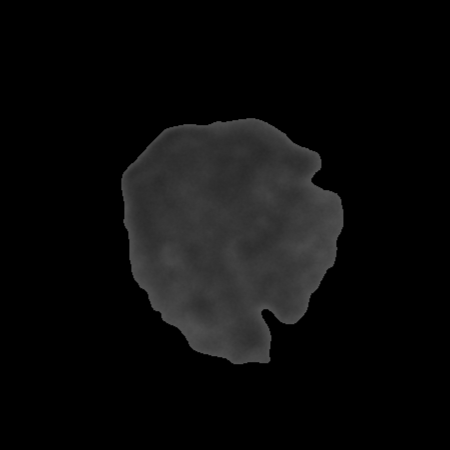

In [ ]:
img1 = Image.open("/content/Dataset/Train/Yes/UID_11_10_1_all.bmp")
display(img1)

In [ ]:
img_width, img_height, dimensions = 300, 300 , 1

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(img_width, img_height, dimensions)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             #tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
                             #tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Flatten(),
                             
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(1,activation = 'sigmoid'),
                             ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer ='adamax' , metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   fill_mode ='nearest',)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
train_dir = '/content/Dataset/Train'
validation_dir = '/content/Dataset/Validation'

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode = 'binary',
                                                    color_mode = 'grayscale',
                                                    target_size = (img_width, img_height),
                                                    batch_size = 128
                                                    )
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                  class_mode = 'binary',
                                                  color_mode="grayscale",
                                                  target_size = (img_width, img_height),
                                                  batch_size = 128
                                                  )

Found 10661 images belonging to 2 classes.
Found 1867 images belonging to 2 classes.


In [ ]:
drive.mount('/content/drive')

In [ ]:
%cd drive/MyDrive/Luekemia_Classification/

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py


In [ ]:
#erl_stop = EarlyStopping(monitor="val_loss",patience=6,restore_best_weights=True,mode="min")
#model_check = ModelCheckpoint(filepath="/content/mySavedModel2.hdf5",save_best_only=True,monitor="val_loss",mode="min")
#lr_rate = ReduceLROnPlateau(monitor="val_loss",patience=3,factor=0.1)

In [ ]:
history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    verbose = 1)

Epoch 1/20
84/84 [==============================] - 69s 817ms/step - loss: 0.5393 - accuracy: 0.7615 - val_loss: 0.6783 - val_accuracy: 0.6990
Epoch 2/20
84/84 [==============================] - 68s 813ms/step - loss: 0.4968 - accuracy: 0.7729 - val_loss: 0.7134 - val_accuracy: 0.6856
Epoch 3/20
84/84 [==============================] - 68s 818ms/step - loss: 0.4975 - accuracy: 0.7719 - val_loss: 0.6933 - val_accuracy: 0.6904
Epoch 4/20
84/84 [==============================] - 68s 804ms/step - loss: 0.4942 - accuracy: 0.7733 - val_loss: 0.7349 - val_accuracy: 0.6840
Epoch 5/20
84/84 [==============================] - 68s 810ms/step - loss: 0.4933 - accuracy: 0.7730 - val_loss: 0.6822 - val_accuracy: 0.6840
Epoch 6/20
84/84 [==============================] - 68s 813ms/step - loss: 0.4879 - accuracy: 0.7790 - val_loss: 0.6987 - val_accuracy: 0.6856
Epoch 7/20
84/84 [==============================] - 67s 800ms/step - loss: 0.4898 - accuracy: 0.7762 - val_loss: 0.7222 - val_accuracy: 0.6861

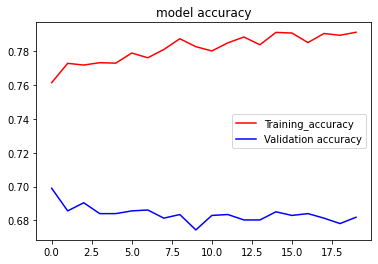

<Figure size 432x288 with 0 Axes>

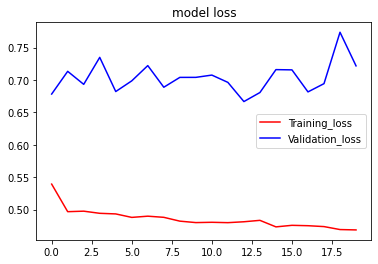

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs , acc , 'r' , label = 'Training_accuracy')
plt.plot(epochs, val_acc, 'b' , label = 'Validation accuracy')
plt.legend(loc = 0)
plt.title('model accuracy')
plt.figure()
plt.show()
plt.plot(epochs, loss, 'r', label = 'Training_loss')
plt.plot(epochs, val_loss , 'b', label = 'Validation_loss')
plt.legend(loc = 0)
plt.title('model loss')
plt.figure()
plt.show()

In [ ]:
acc = model.evaluate(train_generator,steps=len(train_generator),verbose=1)
print('%.2f'%(acc[1]*100))

84/84 [==============================] - 299s 4s/step - loss: 0.4918 - accuracy: 0.7858
78.58
